# Module 4 - Algo Trading using Classification


### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [50]:
dataset = pd.read_csv('week3.csv')
dataset.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Date.1                     0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
year                       0
Month                      0
VWAP                       0
Pct_Change                 0
Trend                      0
avg                       13
upper                     13
lower                     13
dtype: int64

In [51]:
dataset.dropna(inplace = True)
dataset.reset_index(inplace =True)

### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [52]:
dataset['Call'] = 0
for i in np.arange(dataset.avg.size):
    if dataset['Average Price'][i]<=dataset.lower[i]:
        print (i)
        dataset['Call'][i]='Buy'
    elif dataset['Average Price'][i]>=dataset.upper[i]:
        print (i)
        dataset['Call'][i]='Short'
    elif (dataset['Average Price'][i]>dataset.lower[i]) and (dataset['Average Price'][i]<=dataset.avg[i]):
        print (i)
        dataset['Call'][i] = 'Hold Buy/Liquidate Short'
    else:
        print(i)
        dataset['Call'][i]= 'Hold Short/Liquidate Buy'
        
 
    

0
1
2
3
4
5
6


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda/lib/python3.6/site-packages/ipy

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295


In [53]:
dataset.Call.value_counts()


Hold Short/Liquidate Buy    263
Hold Buy/Liquidate Short    184
Short                        20
Buy                          14
Name: Call, dtype: int64

In [54]:
X = dataset[['Average Price','upper','lower', 'avg']]
y = dataset['Call']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 50)

In [55]:
classifier = RandomForestClassifier(n_estimators = 200,criterion = 'entropy',random_state = 15, max_depth =10)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

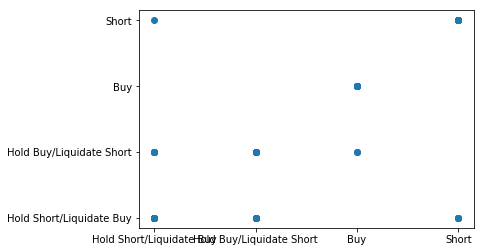

In [56]:
y_pred = classifier.predict(X)
plt.scatter(y,y_pred)
plt.show()

In [57]:
cmp=[y.values,y_pred]
cmp = pd.DataFrame(cmp)
cmp=cmp.T
cmp

,0,1
0,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
1,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
2,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
3,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
4,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
5,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
6,Buy,Buy
7,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
8,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short
9,Hold Buy/Liquidate Short,Hold Buy/Liquidate Short


In [58]:
#Number of mismatch
f=0
for i in np.arange(len(dataset.avg)):
    if cmp.iloc[i,0]!=cmp.iloc[i,1]:
        f=f+1
print(f)


19


In [59]:
# Accuracy in percentage
accuracy = ((y_test.size-f)/y_test.size)*100
accuracy

84.29752066115702

In [60]:
data =pd.read_csv('PVR.csv')
def bollinger(p):
    avg = p.rolling(14).mean()
    sd = p.rolling(14).std()
    ub = avg + (sd*2)
    db = avg - (sd*2)
    return  np.round(avg,3), np.round(ub,3), np.round(db,3)

data['avg'],data['upper'],data['lower'] = bollinger(data['Close Price'])
data.dropna(inplace = True)
data.reset_index(inplace =True)
data

,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,avg,upper,lower
0,13,PVR,EQ,01-Jun-2017,1454.95,1452.00,1469.70,1452.00,1455.00,1455.70,1459.95,59522,8.689907e+07,3090,23335,39.20,1486.739,1551.543,1421.935
1,14,PVR,EQ,02-Jun-2017,1455.70,1457.30,1466.90,1452.35,1460.00,1457.80,1462.45,55880,8.172155e+07,2865,29238,52.32,1481.943,1544.464,1419.422
2,15,PVR,EQ,05-Jun-2017,1457.80,1458.90,1464.65,1440.00,1444.00,1442.25,1452.10,102733,1.491781e+08,4617,51065,49.71,1475.032,1531.479,1418.585
3,16,PVR,EQ,06-Jun-2017,1442.25,1445.00,1447.45,1378.85,1390.00,1392.85,1411.78,210916,2.977667e+08,16465,89785,42.57,1465.214,1527.739,1402.690
4,17,PVR,EQ,07-Jun-2017,1392.85,1391.10,1409.00,1387.00,1400.00,1400.70,1400.17,165824,2.321824e+08,7911,70517,42.53,1457.046,1521.377,1392.716
5,18,PVR,EQ,08-Jun-2017,1400.70,1400.70,1498.50,1382.30,1461.00,1454.00,1465.71,596919,8.749125e+08,21846,142853,23.93,1452.793,1508.299,1397.287
6,19,PVR,EQ,09-Jun-2017,1454.00,1465.00,1479.85,1443.00,1470.00,1472.25,1471.65,403598,5.939540e+08,18344,241292,59.79,1452.168,1506.490,1397.846
7,20,PVR,EQ,12-Jun-2017,1472.25,1477.00,1507.00,1470.00,1495.00,1488.95,1492.22,306349,4.571401e+08,17326,98821,32.26,1451.632,1504.193,1399.072
8,21,PVR,EQ,13-Jun-2017,1488.95,1490.55,1505.00,1474.00,1500.00,1496.30,1489.41,195198,2.907297e+08,8620,101610,52.05,1454.939,1512.633,1397.245
9,22,PVR,EQ,14-Jun-2017,1496.30,1505.50,1550.00,1490.60,1522.00,1522.50,1516.74,221887,3.365445e+08,10671,76207,34.34,1459.321,1527.428,1391.215


In [62]:
X = data[['Average Price','upper','lower', 'avg']]
data['Call'] = classifier.predict(X)
data.Call.value_counts()

Hold Short/Liquidate Buy    303
Short                       163
Hold Buy/Liquidate Short     16
Name: Call, dtype: int64

In [64]:
#Query 2
dataset = pd.read_csv('PVR.csv')
dataset['Day_Pct_Change'] = (dataset['Close Price'].pct_change())*10
dataset['Open-Close'] = (dataset['Open Price'] - dataset['Close Price'])/dataset['Open Price']
dataset['High-Low'] = (dataset['High Price'] - dataset['Low Price'])/dataset['High Price']
dataset['Mean'] = dataset['Day_Pct_Change'].rolling(5).mean()
dataset['Std'] = dataset['Day_Pct_Change'].rolling(5).std()
dataset.dropna(inplace =True)


In [77]:
dataset['Action'] = np.where(dataset['Close Price'].shift(-1)>dataset['Close Price'], 1, -1)


In [80]:
X = dataset[['Open-Close','High-Low','Mean','Std']]
y = dataset['Action']


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 50)
cls = RandomForestClassifier(random_state =10)
model = cls.fit(X_train,y_train)

In [84]:
# Checking accuracy 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test))*100)

48.78048780487805


In [85]:
dataset['Returns'] = dataset.Day_Pct_Change*model.predict(X)

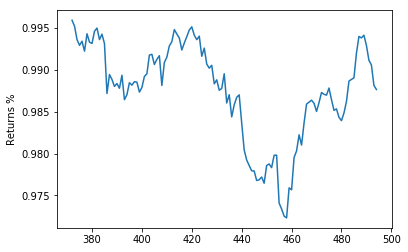

In [96]:
((dataset.Returns[y_train.size:]+100)/100).cumprod().plot()
plt.ylabel('Returns %')
plt.show()
